In [1]:
"C:\Users\srima\OneDrive\Pictures\Screenshots\assign.png"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2035158829.py, line 1)

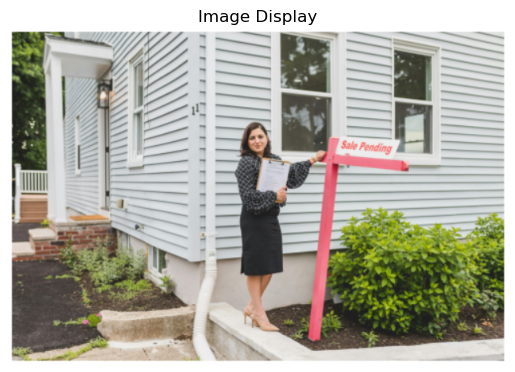

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_path = r"C:\Users\srima\OneDrive\Pictures\Screenshots\assign.png"  # Provide the correct image path
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (because OpenCV uses BGR, but matplotlib expects RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title("Image Display")
plt.axis('off')  # Hide axis
plt.show()


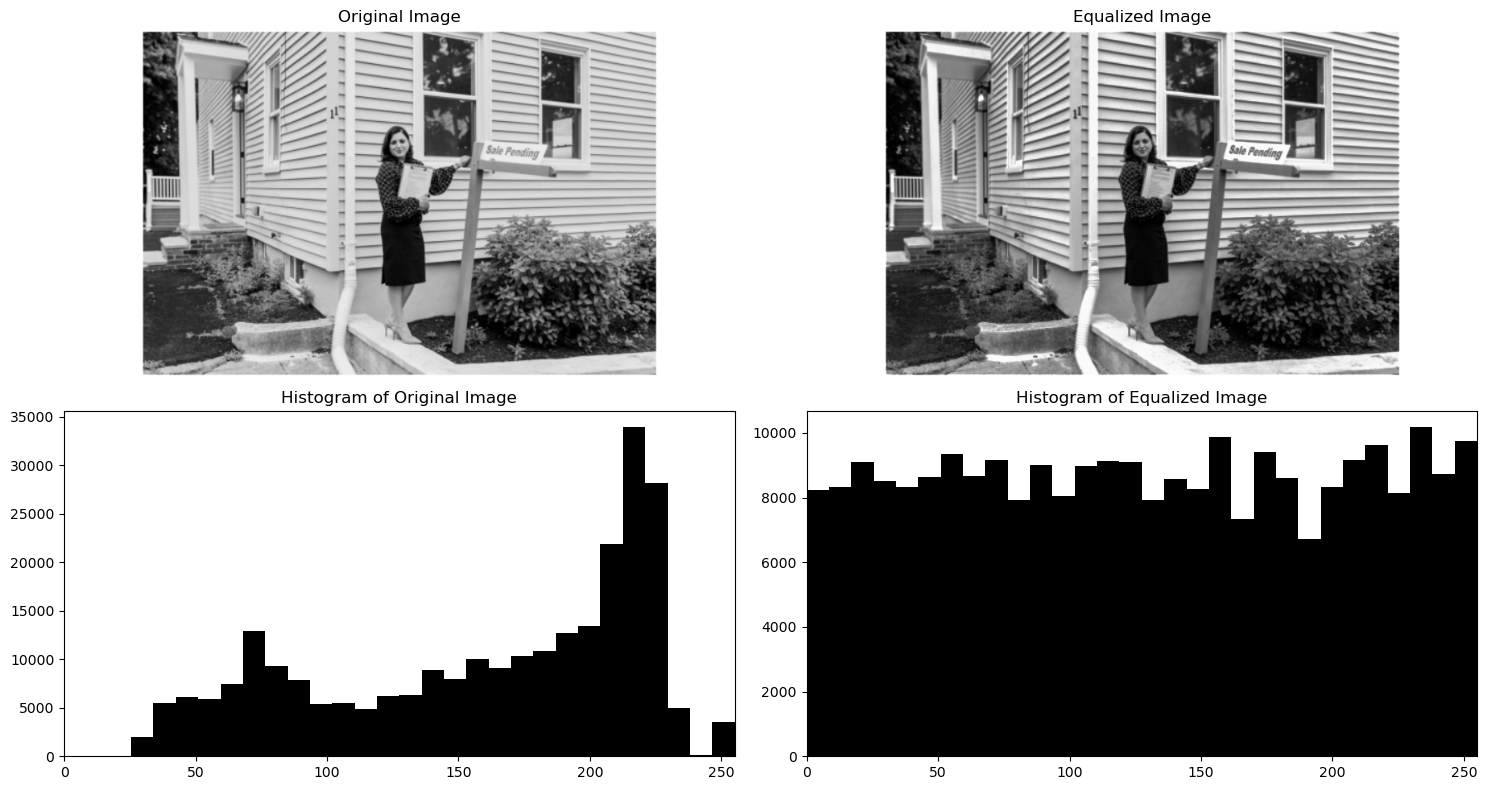

Equalized image saved as equalized_image.jpg


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Correct the file path with proper handling
image_path = r"C:\Users\srima\OneDrive\Pictures\Screenshots\assign.png" # Adjust path if needed

# Check if the image exists at the specified path
if not os.path.exists(image_path):
    print(f"Error: The file at {image_path} does not exist. Please check the path.")
else:
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image is not corrupted.")
    else:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        equalized_image = cv2.equalizeHist(gray_image)

        # Display the original and equalized images with histograms
        plt.figure(figsize=(15, 8))

        # Original Image
        plt.subplot(2, 2, 1)
        plt.imshow(gray_image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        # Equalized Image
        plt.subplot(2, 2, 2)
        plt.imshow(equalized_image, cmap='gray')
        plt.title('Equalized Image')
        plt.axis('off')

        # Histogram of Original Image
        plt.subplot(2, 2, 3)
        plt.hist(gray_image.ravel(), bins=30, range=(0, 255), color='black')
        plt.title('Histogram of Original Image')
        plt.xlim([0, 255])

        # Histogram of Equalized Image
        plt.subplot(2, 2, 4)
        plt.hist(equalized_image.ravel(), bins=30, range=(0, 255), color='black')
        plt.title('Histogram of Equalized Image')
        plt.xlim([0, 255])

        # Show the images and histograms
        plt.tight_layout()
        plt.show()

        # Save the equalized image
        output_path = 'equalized_image.jpg'
        cv2.imwrite(output_path, equalized_image)  # Save to a file
        print(f"Equalized image saved as {output_path}")


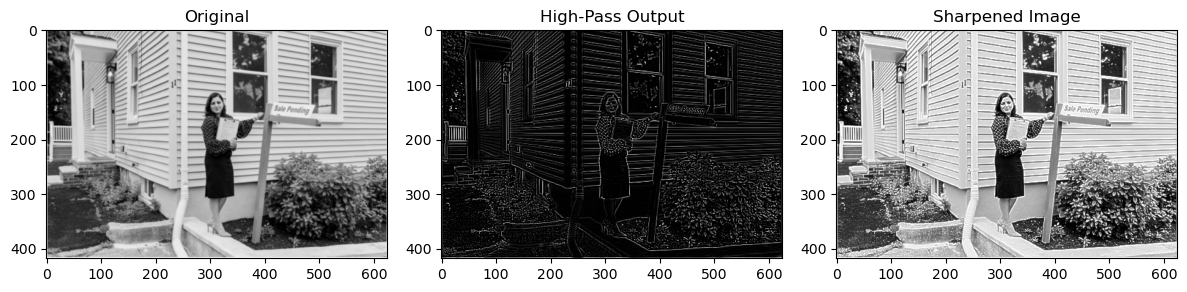

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load the image
img = cv2.imread(r"C:\Users\srima\OneDrive\Pictures\Screenshots\assign.png")  # Replace with your actual image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for sharpening

# Step 2: Create a high-pass filter kernel
# This kernel emphasizes the center pixel and subtracts its neighbors
high_pass_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Step 3: Apply the high-pass filter using convolution
high_pass = cv2.filter2D(img, -1, high_pass_kernel)

# Optional: Add the high-pass result back to the original to get a sharpened image
sharpened = cv2.addWeighted(img, 1.0, high_pass, 1.0, 0)

# Step 4: Display the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('High-Pass Output')
plt.imshow(high_pass, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sharpened Image')
plt.imshow(sharpened, cmap='gray')

plt.tight_layout()
plt.show()


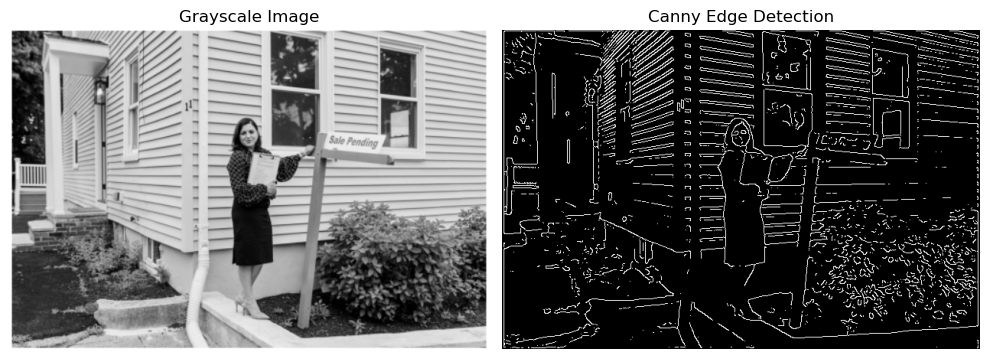

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale (Canny works on grayscale)
image = cv2.imread(r"C:\Users\srima\OneDrive\Pictures\Screenshots\assign.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=150, threshold2=150)

# Display original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


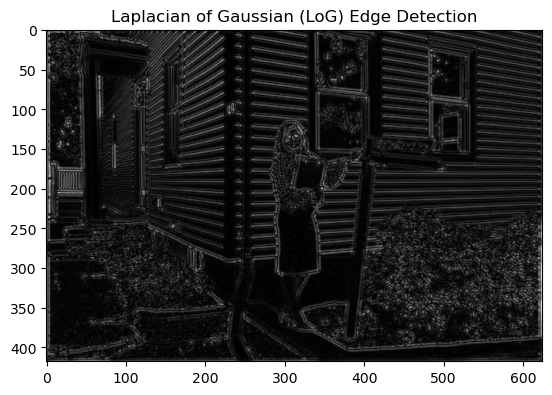

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread(r"C:\Users\srima\OneDrive\Pictures\Screenshots\assign.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian of Gaussian (LoG)
log_edges = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Display the result
plt.imshow(np.abs(log_edges), cmap='gray')
plt.title('Laplacian of Gaussian (LoG) Edge Detection')
plt.show()

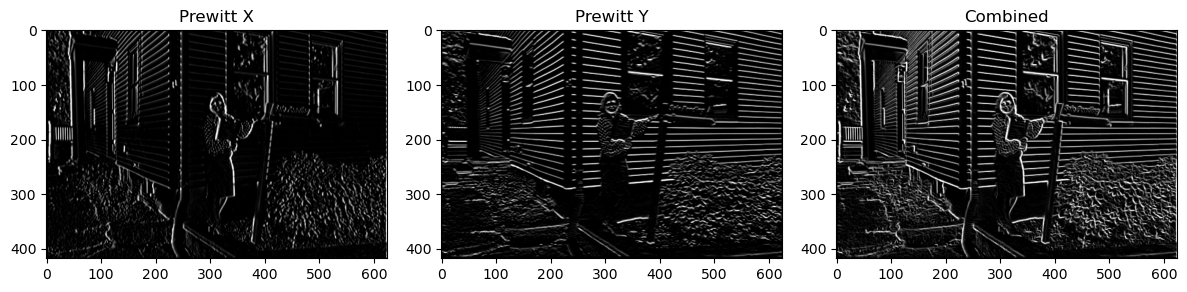

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread(r"C:\Users\srima\OneDrive\Pictures\Screenshots\assign.png", cv2.IMREAD_GRAYSCALE)

# Define Prewitt kernels
kernelx = np.array([[ -1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]])

kernely = np.array([[ 1, 1, 1],
                    [ 0, 0, 0],
                    [-1, -1, -1]])

# Apply filters
img_prewitt_x = cv2.filter2D(image, -1, kernelx)
img_prewitt_y = cv2.filter2D(image, -1, kernely)

# Combine edges
prewitt_combined = cv2.bitwise_or(img_prewitt_x, img_prewitt_y)

# Display results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img_prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.subplot(1,3,2), plt.imshow(img_prewitt_y, cmap='gray'), plt.title('Prewitt Y')
plt.subplot(1,3,3), plt.imshow(prewitt_combined, cmap='gray'), plt.title('Combined')
plt.tight_layout()
plt.show()


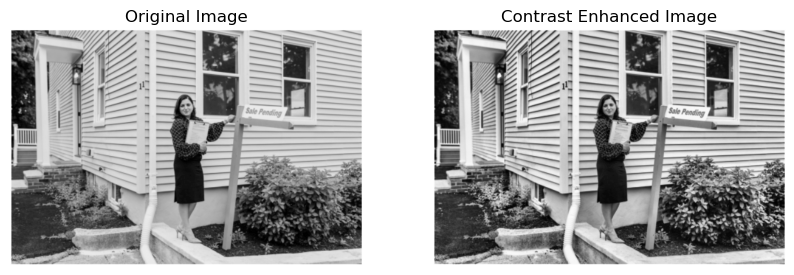

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\srima\OneDrive\Pictures\Screenshots\assign.png", 0)  # 0 = grayscale

# Create a CLAHE object (you can tweak clipLimit and tileGridSize)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_img = clahe.apply(img)

# Plot Original and Enhanced Images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Contrast Enhanced Image')
plt.imshow(contrast_enhanced_img, cmap='gray')
plt.axis('off')

plt.show()


In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the pre-trained MobileNetV2 model from TensorFlow Keras
model = MobileNetV2(weights='imagenet')



# Convert the image to RGB (OpenCV loads images in BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to 224x224 pixels, as expected by MobileNetV2
img_resized = cv2.resize(img_rgb, (224, 224))

# Preprocess the image (this is specific to the MobileNetV2 model)
img_preprocessed = np.expand_dims(img_resized, axis=0)  # Add batch dimension
img_preprocessed = preprocess_input(img_preprocessed)

# Make predictions using the model
predictions = model.predict(img_preprocessed)

# Decode the predictions into readable class labels
decoded_predictions = decode_predictions(predictions, top=1)[0]
predicted_label, predicted_description, predicted_score = decoded_predictions[0]

# Display the result
print(f"Predicted Label: {predicted_label}")
print(f"Description: {predicted_description}")
print(f"Confidence Score: {predicted_score * 100:.2f}%")

# Display the image with the prediction label
cv2.putText(img, f"{predicted_description}: {predicted_score * 100:.2f}%", 
            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Convert BGR image to RGB for displaying using matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot using matplotlib
import matplotlib.pyplot as plt
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'tensorflow'